In [1]:
import sys
!{sys.executable} -m pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import json
import seaborn as sns
import pandas as pd

In [34]:
with open('./data.json', 'r') as f:
    json_data = json.loads(f.read())
df = pd.DataFrame(json_data)
def set_color(row):
    if row["positivityRate"] > 5 and row["casesPer100k"] > 8:
        return "red"
    elif row["positivityRate"] < 5 and row["casesPer100k"] > 8:
        return "yellow"
    elif row["positivityRate"] > 5 and row["casesPer100k"] < 8:
        return "yellow"
    elif row["positivityRate"] < 5 and row["casesPer100k"] < 8:
        return "green"

df = df.assign(color=df.apply(set_color, axis=1))
print(df)


           name     endDate  positivityRate  casesPer100k  color
0    Bernalillo  2020-09-01             2.1           4.8  green
1        Catron  2020-09-01             0.0           0.0  green
2        Chaves  2020-09-01             7.5          20.2    red
3        Cibola  2020-09-01             0.8           2.4  green
4        Colfax  2020-09-01             0.0           0.0  green
..          ...         ...             ...           ...    ...
292     Socorro  2020-12-14            10.1          60.5    red
293        Taos  2020-12-14             6.7          38.1    red
294    Torrance  2020-12-14            11.5          37.3    red
295       Union  2020-12-14            21.3         101.1    red
296    Valencia  2020-12-14            15.3          96.3    red

[297 rows x 5 columns]


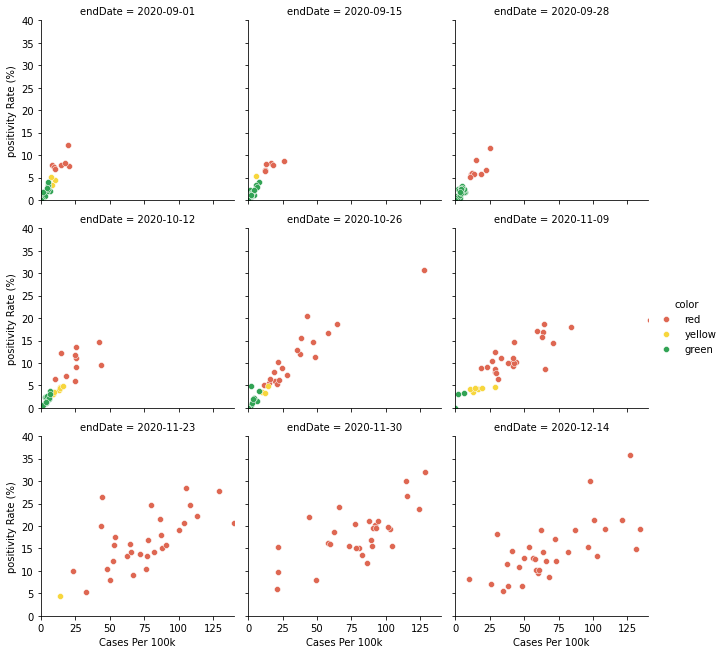

In [59]:
g = sns.FacetGrid(df, col="endDate",col_wrap=3, hue="color", hue_order=['red','yellow','green'])
colors = ['#de6752','#f7d63c','#31a354']
sns.set_palette(sns.color_palette(colors))
g.map_dataframe(sns.scatterplot, x="casesPer100k", y="positivityRate")
g.set(xlim=(0, 140), ylim=(0, 40))
g.set_axis_labels("Cases Per 100k", "positivity Rate (%)")
g.add_legend()